In [ ]:
!pip install kaggle

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image

%matplotlib inline

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 32.9MB/s]
100% 2.29G/2.29G [00:30<00:00, 79.9MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [ ]:
!rm -rf chest-xray-pneumonia.zip

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'), 
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 33, 33, 64)       

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    'chest_xray/chest_xray/train/',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    'chest_xray/chest_xray/val/',
    target_size = (300, 300),
    batch_size =128,
    class_mode = 'binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = validation_generator,
    verbose=2
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
10/10 - 13s - loss: 0.6129 - accuracy: 0.7023 - val_loss: 0.8181 - val_accuracy: 0.5000
Epoch 2/10
10/10 - 14s - loss: 0.5849 - accuracy: 0.7352 - val_loss: 0.7744 - val_accuracy: 0.5000
Epoch 3/10
10/10 - 13s - loss: 0.5636 - accuracy: 0.7367 - val_loss: 0.7093 - val_accuracy: 0.5000
Epoch 4/10
10/10 - 14s - loss: 0.5220 - accuracy: 0.7367 - val_loss: 0.6046 - val_accuracy: 0.8125
Epoch 5/10
10/10 - 13s - loss: 0.3859 - accuracy: 0.8389 - val_loss: 0.4795 - val_accuracy: 0.8750
Epoch 6/10
10/10 - 13s - loss: 0.2374 - accuracy: 0.8914 - val_loss: 0.6243 - val_accuracy: 0.7500
Epoch 7/10
10/10 - 13s - loss: 0.1922 - accuracy: 0.9258 - val_loss: 1.2245 - val_accuracy: 0.6250
Epoch 8/10
10/10 - 13s - loss: 0.1590 - accuracy: 0.9430 - val_loss: 1.1239 - val_accuracy: 0.6875
Epoch 9/10
10/10 - 13s - loss: 0.1552 - accuracy: 0.9391 - val_loss: 0.7656 - val_accuracy: 0.6875
Epoch 10/10
10/10 - 13s - l

In [ ]:
eval_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = eval_datagen.flow_from_directory(
    'chest_xray/chest_xray/test/',
    target_size = (300, 300),
    batch_size = 128, 
    class_mode = 'binary'
)

eval_result = model.evaluate_generator(test_generator, 624)
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])


Found 624 images belonging to 2 classes.
loss rate at evaluation data : 0.5208135843276978
accuracy rate at evaluation data : 0.807692289352417


**We get train accuracy as 93.5%, validation accuracy as 87.55% and test accuracy as 80.7%**

**Try with a google image (Positive)**

[1.]
pneumonia_pos.jpg is COVID19 pneumonia


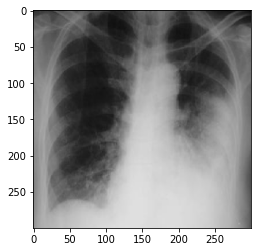

In [ ]:
path = 'pneumonia_pos.jpg'
img = image.load_img(path, target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)

images = np.vstack([x])
classes = model.predict(images)
print(classes[0])
if classes[0]> 0.5:
  print(path + ' is COVID19 pneumonia')
  plt.imshow(img)
else:
  print(path + ' is Normal')
  plt.imshow(img)


**Try with a google image (Negative)**

[0.]
pneumonia_neg.jpg is Normal


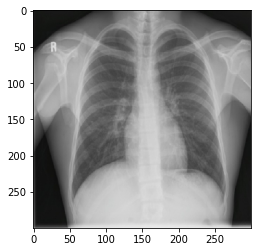

In [ ]:
path = 'pneumonia_neg.jpg'
img = image.load_img(path, target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)

images = np.vstack([x])
classes = model.predict(images)
print(classes[0])
if classes[0]> 0.5:
  print(path + ' is COVID19 pneumonia')
  plt.imshow(img)
else:
  print(path + ' is Normal')
  plt.imshow(img)

**Save the model**

In [ ]:
VERSION = '1'
saved_model_path = model.save(f"./tmp/{VERSION}", save_format='tf')

INFO:tensorflow:Assets written to: ./tmp/1/assets


In [ ]:
import subprocess
subprocess.run([f"saved_model_cli show --dir ./tmp/{VERSION}/ --all"],shell=True)
# Zipping the model as model.tar.gz
subprocess.run([f"tar cvfz model.tar.gz tmp/{VERSION}/"],shell=True)

CompletedProcess(args=['tar cvfz model.tar.gz tmp/1/'], returncode=0)

In [ ]:
files.download('model.tar.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json
path = 'pneumonia_pos.jpg'
img = image.load_img(path, target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)
images= np.vstack([x])

# Wrap bitstring in JSON
data = json.dumps({"signature_name": "serving_default", "instances": images.tolist()})
json_file = open('predict_2.json', 'w')
json_file.write(data)
json_file.close()
files.download('predict_2.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>